In [1]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
mer_photometry_full = Table.read('/home/aalvarez/Downloads/EUC_MER_FINAL-CAT_285054_20191023T154725.3Z_00.00.fits')
phz_photometry = Table.read('/run/media/aalvarez/Astrodata/Work/Data/SC456/WithKids/EUC_PHZ_REFPHOT__20190528T122127.3Z_00.00.fits', hdu=1)

In [3]:
mer_filter = (mer_photometry_full['FLUX_VIS_APER'] / mer_photometry_full['FLUXERR_VIS_APER'] > 2.5)
print('{:.2f}%%'.format(100 * mer_filter.sum() / len(mer_photometry_full)))
mer_photometry = mer_photometry_full[mer_filter]

82.68%%


In [4]:
band_map = {
    'kids_u': ('FLUX_U_EXT_OMEGACAM_APER', 'FLUXERR_U_EXT_OMEGACAM_APER'),
    'kids_g': ('FLUX_G_EXT_OMEGACAM_APER', 'FLUXERR_G_EXT_OMEGACAM_APER'),
    'kids_r': ('FLUX_R_EXT_OMEGACAM_APER', 'FLUXERR_R_EXT_OMEGACAM_APER'),
    'kids_i': ('FLUX_I_EXT_OMEGACAM_APER', 'FLUXERR_I_EXT_OMEGACAM_APER'),
    'VIS': ('FLUX_VIS_APER', 'FLUXERR_VIS_APER'),
    'Y': ('FLUX_Y_APER', 'FLUXERR_Y_APER'),
    'J': ('FLUX_J_APER', 'FLUXERR_J_APER'),
    'H': ('FLUX_H_APER', 'FLUXERR_H_APER'),
}

In [5]:
def plot_photometries(reference_band, target_bands, ncols=3, figsize=(25, 8), title=None):
    nrows = len(target_bands) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()

    for i, band in enumerate(target_bands):
        mer_ref = mer_photometry[band_map[reference_band][0]]
        mer_ref_err = mer_photometry[band_map[reference_band][1]]
        mer_band = mer_photometry[band_map[band][0]]
        mer_band_err = mer_photometry[band_map[band][1]]
        phz_ref = phz_photometry[reference_band]
        phz_band = phz_photometry[band]
        
        #mer_not_nan = ~np.logical_or(np.isnan(mer_ref), np.isnan(mer_band))
        #mer_ref = mer_ref[mer_not_nan]
        #mer_band = mer_band[mer_not_nan]
        
        #axes[i].errorbar(mer_ref, mer_band, xerr=mer_ref_err, yerr=mer_band_err, fmt='.', c='r', zorder=1, label='MER')
        axes[i].scatter(phz_ref, phz_band, marker='.', alpha=0.2, c='b', label='PHZ')
        axes[i].scatter(mer_ref, mer_band, marker='.', alpha=0.2, c='r', label='MER')
        axes[i].set_xlabel(reference_band)
        axes[i].set_ylabel(band)
        axes[i].set_xscale('symlog')
        axes[i].set_yscale('symlog')
        axes[i].set_xlim(min(np.nanmin(mer_ref), np.nanmin(phz_ref)), max(np.nanmax(mer_ref), np.nanmax(phz_ref)))
        axes[i].set_ylim(min(np.nanmin(mer_band), np.nanmin(phz_band)), max(np.nanmax(mer_band), np.nanmax(phz_band)))
        axes[i].legend()
        
    if title:
        fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Compare photometries only EUCLID

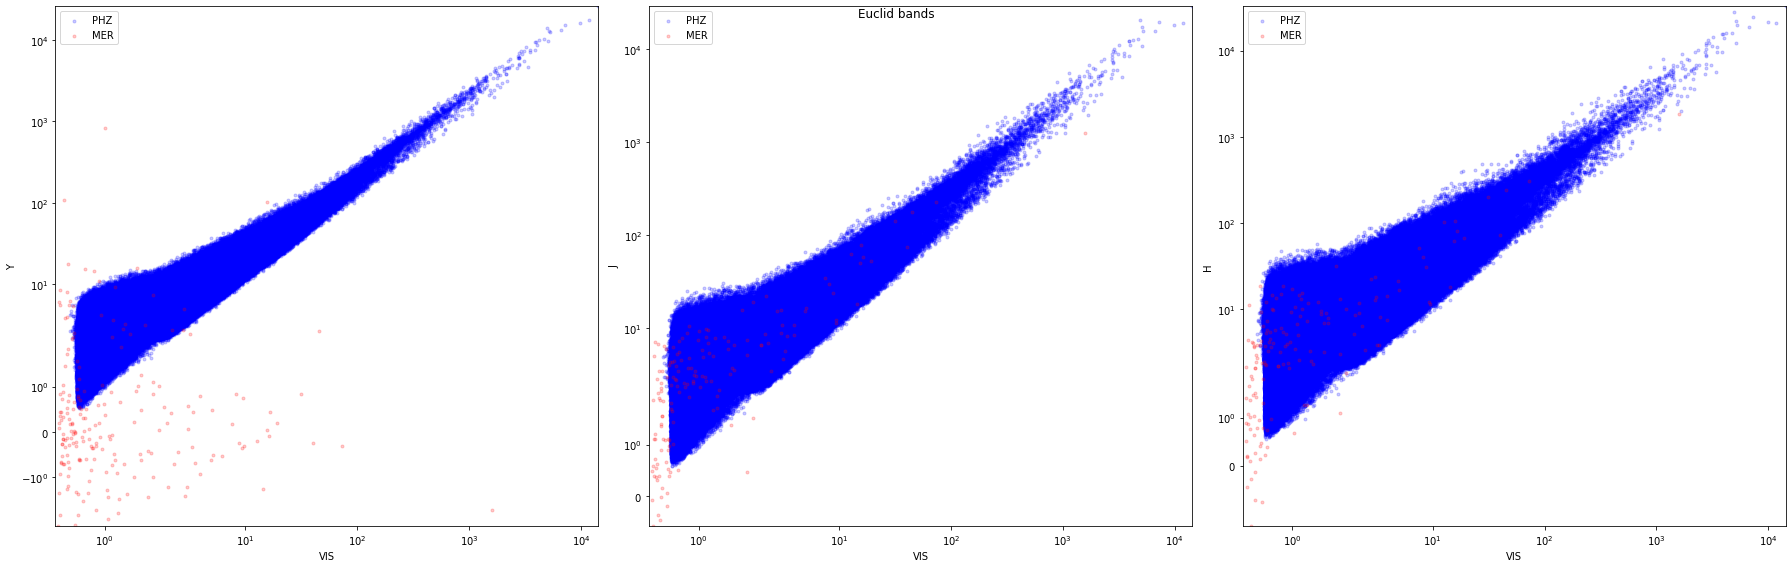

In [6]:
plot_photometries('VIS', ['Y', 'J', 'H'], title='Euclid bands')

# Compare photometries only KIDS

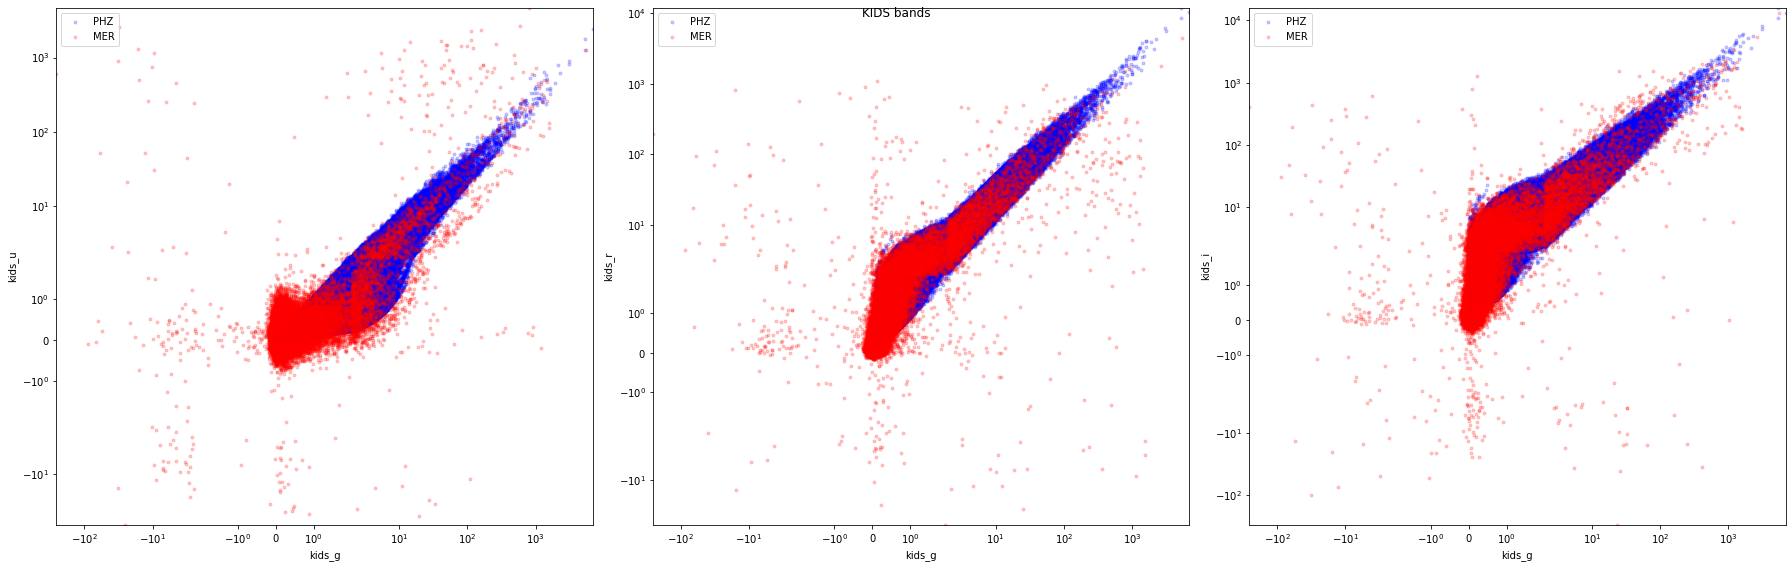

In [7]:
plot_photometries('kids_g', ['kids_u', 'kids_r', 'kids_i'], title='KIDS bands')

# Compare photometries of KIDS vs Euclid

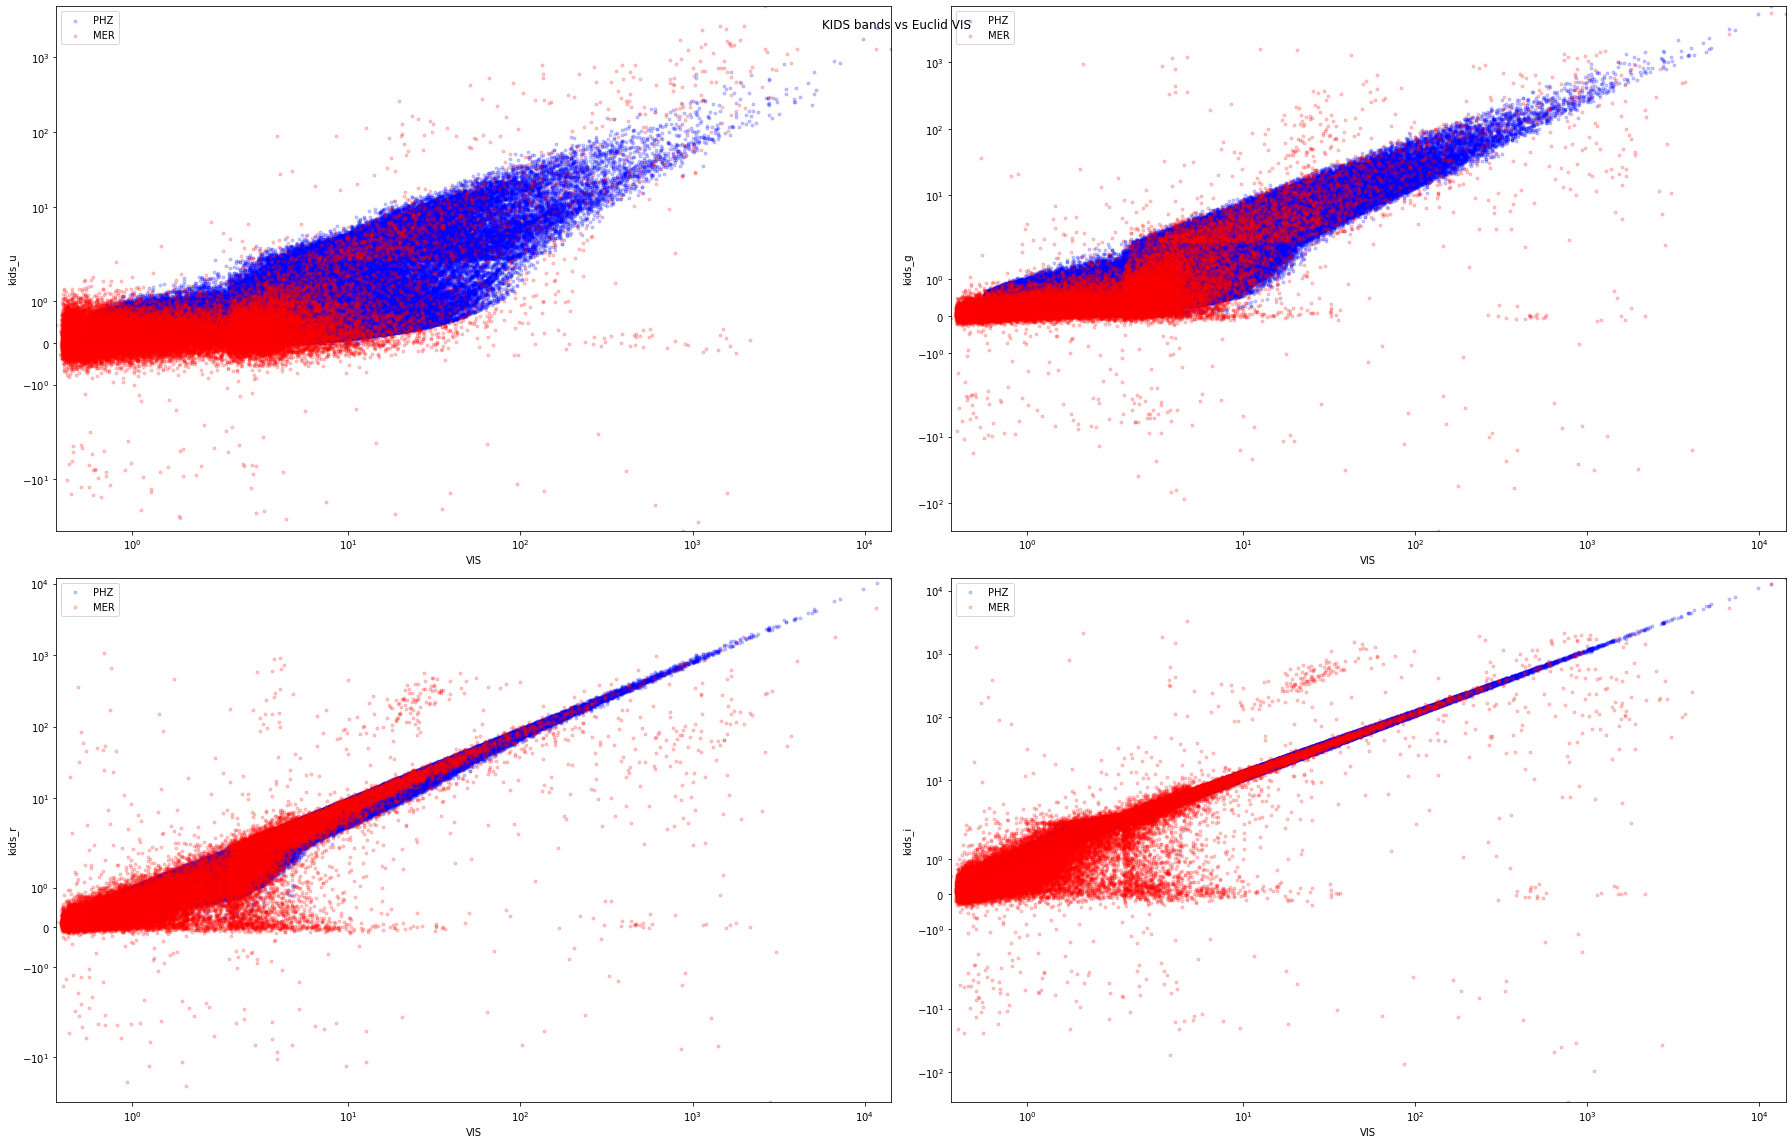

In [8]:
plot_photometries('VIS', ['kids_u', 'kids_g', 'kids_r', 'kids_i'], ncols=2, title='KIDS bands vs Euclid VIS', figsize=(25, 16))

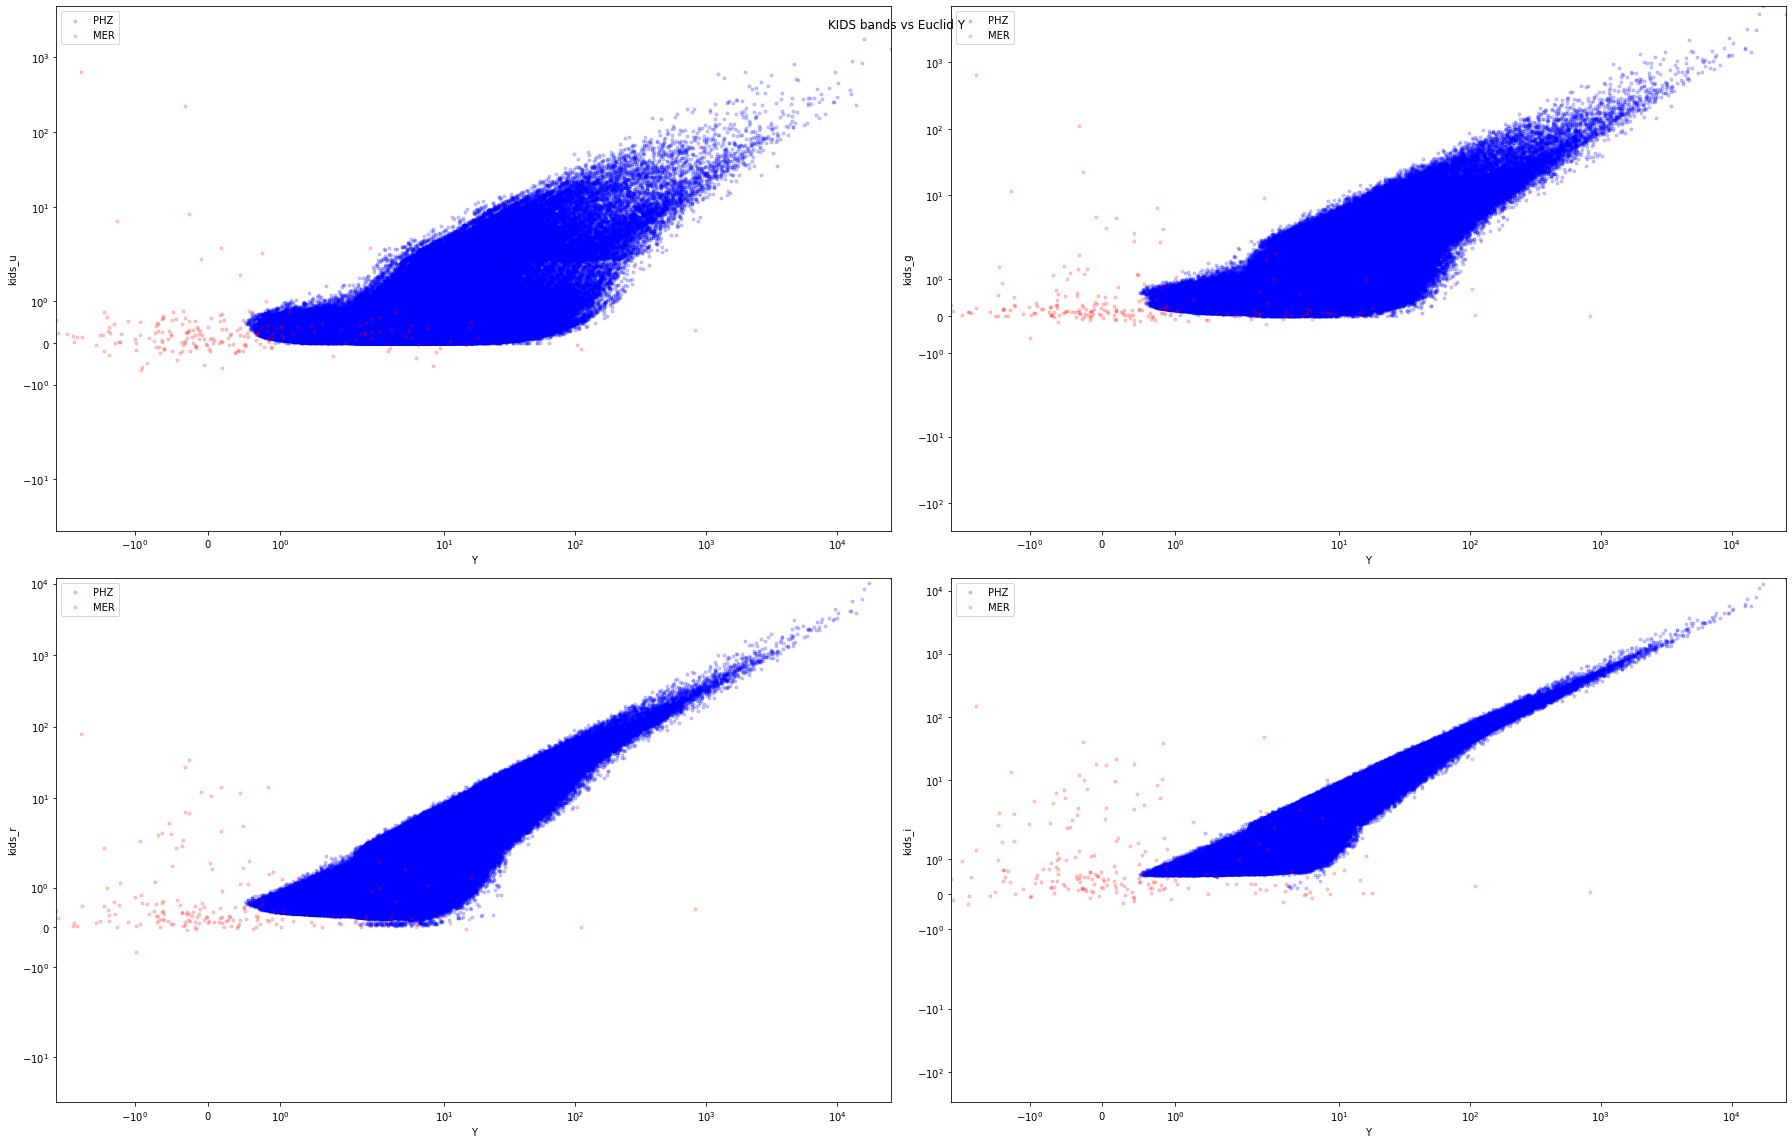

In [9]:
plot_photometries('Y', ['kids_u', 'kids_g', 'kids_r', 'kids_i'], ncols=2, title='KIDS bands vs Euclid Y', figsize=(25, 16))